In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:\Data Science labs\Data for Practice\Titanic-Train-Data.csv")

In [3]:
df = data

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


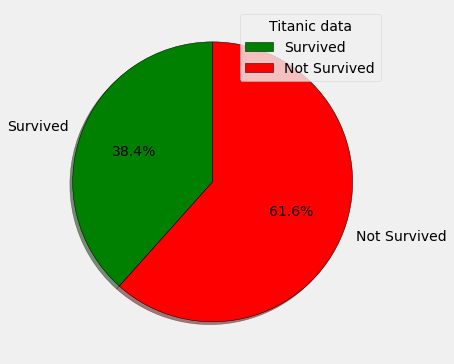

In [5]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,6))
Survived = data[data['Survived'] == 1].shape[0]
Not_Survived = data[data['Survived']==0].shape[0]

class_ = [Survived, Not_Survived]
labels = ['Survived','Not Survived']

plt.pie(class_, labels=labels, shadow=True,autopct='%4.1f%%', startangle=90, wedgeprops={'edgecolor':'black'}, colors=['green','red'])
plt.legend(title='Titanic data')
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

 0   PassengerId      int64    Continuous feature
 
 1   Survived         int64    output label
 
 2   Pclass           int64    Ordinal feature
 
 3   Name             object   Categorical feature
 
 4   Sex              object   Categorical feature
 
 5   Age              float64  Continoues feature
 
 6   SibSp            int64    Continuous feature
 
 7   Parch            int64    Contunious feature
 
 8   Ticket           object   Categorical feature
 
 9   Fare             float64  Continous feature
 
 10  Cabin            object   Categorical feature
 
 11  Embarked         object   Categorical feature

*Pclass ===> Ordinal features*

In [8]:
pd.crosstab(data['Pclass'],data['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


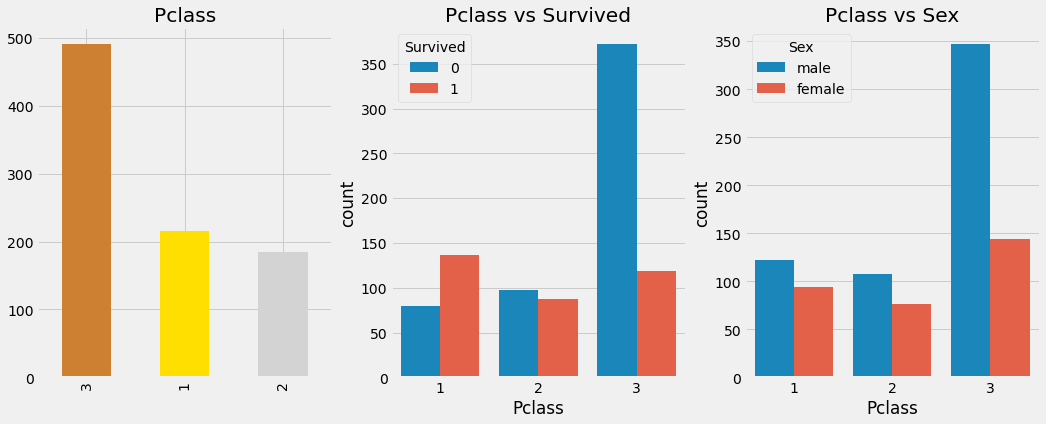

In [27]:
f,ax = plt.subplots(1,3, figsize=(16,6))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Pclass')

sns.countplot(x = 'Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass vs Survived')

sns.countplot(x='Pclass',hue='Sex', data=data, ax=ax[2])
ax[2].set_title('Pclass vs Sex')

plt.show()

In [10]:
pd.crosstab([df['Sex'],df['Survived']],df['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

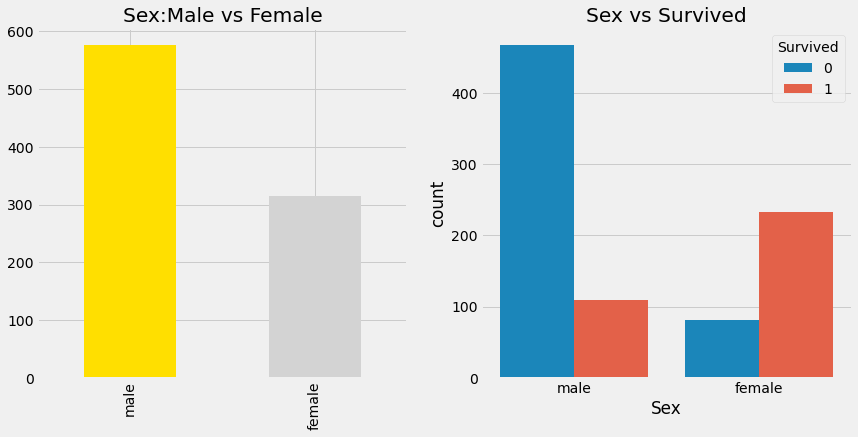

In [28]:
f,ax = plt.subplots(1,2,figsize=(13,6))

data['Sex'].value_counts().plot.bar(color=['#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Sex:Male vs Female')

sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex vs Survived')

plt.show()

In [12]:
print(f'Yougest Person is {data.Age.min()} Years')
print(f'Oldest Person is {data.Age.max()} Years')
print(f'Average Person is {data.Age.mean()} Years')

Yougest Person is 0.42 Years
Oldest Person is 80.0 Years
Average Person is 29.69911764705882 Years


In [13]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [14]:
pd.crosstab(data['Initial'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace =True)

In [16]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [17]:
data.loc[(data.Age.isnull())&(data['Initial'] == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data['Initial'] == 'Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data['Initial'] == 'Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data['Initial'] == 'Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data['Initial'] == 'Other'),'Age'] = 46

In [18]:
data.Age.isnull().any()

False

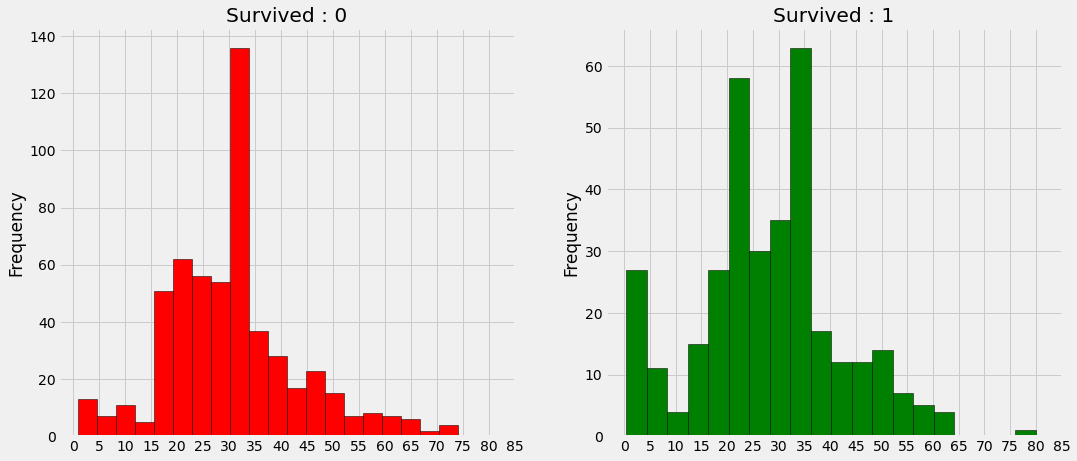

In [19]:
f,ax = plt.subplots(1,2,figsize=(16,7))

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1],bins=20,color='green',edgecolor='black')
ax[1].set_title('Survived : 1')
x1 = list(range(0,90,5))
ax[1].set_xticks(x1)

data[data['Survived'] == 0].Age.plot.hist(ax=ax[0],bins=20,color='red',edgecolor='black')
ax[0].set_title('Survived : 0')
x2 = list(range(0,90,5))
ax[0].set_xticks(x2)

plt.show()

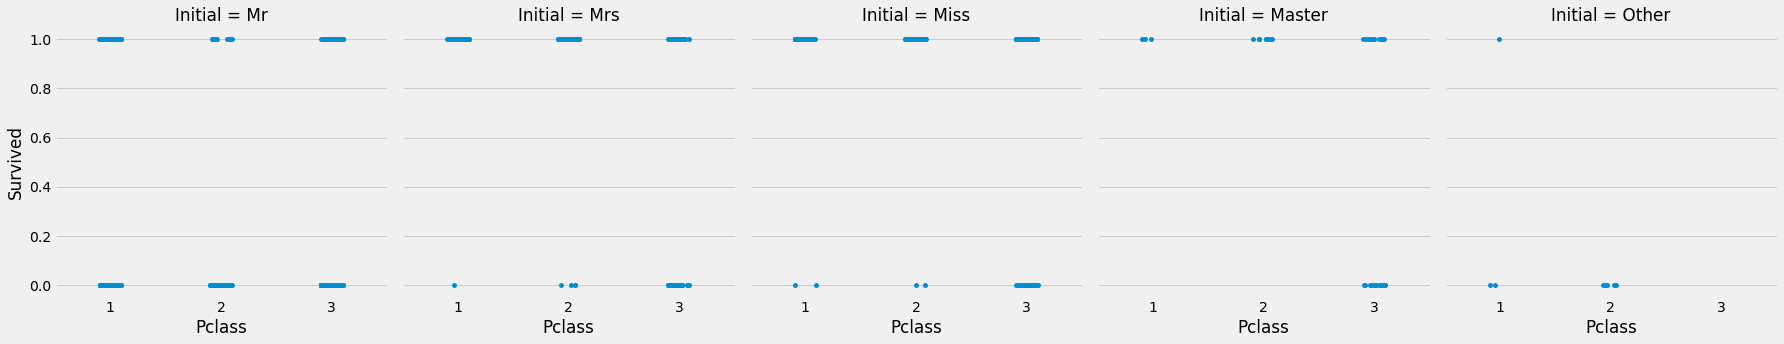

In [32]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data)
plt.show()

In [21]:
pd.crosstab([data['Embarked'],data['Pclass']],[df['Sex'],df['Survived']], margins = True).style.background_gradient(cmap='summer_r')

In [22]:
data['Embarked'].fillna('S',inplace=True)

In [23]:
pd.crosstab(df['SibSp'],data['Survived'],margins=True).T.style.background_gradient(cmap='summer_r')

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
All,608,209,28,16,18,5,7,891


In [24]:
pd.crosstab(data.SibSp,data.Pclass).T.style.background_gradient(cmap='summer_r')

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,137,71,5,3,0,0,0
2,120,55,8,1,0,0,0
3,351,83,15,12,18,5,7


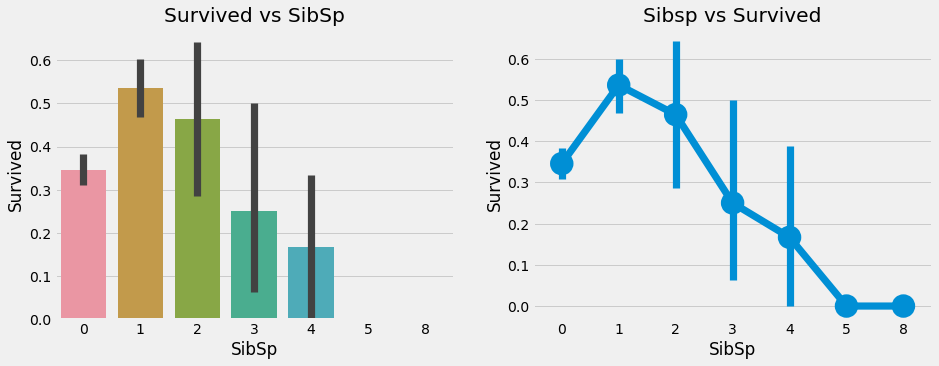

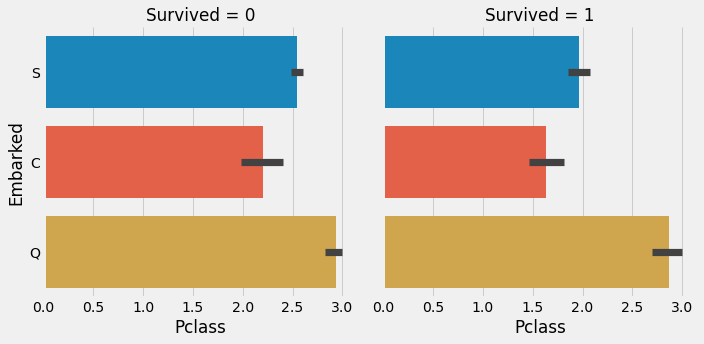

In [35]:
f,ax=plt.subplots(1,2,figsize=(14,5))
sns.barplot(x='SibSp',y='Survived',data=data, ax=ax[0])
ax[0].set_title('Survived vs SibSp')

sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Sibsp vs Survived')

sns.catplot(x='Pclass',y='Embarked',col='Survived',kind='bar',data=data)
plt.show()

In [36]:
pd.crosstab([data['Parch'],df['Pclass']],df['Survived'],margins=True).T.style.background_gradient(cmap='summer_r')

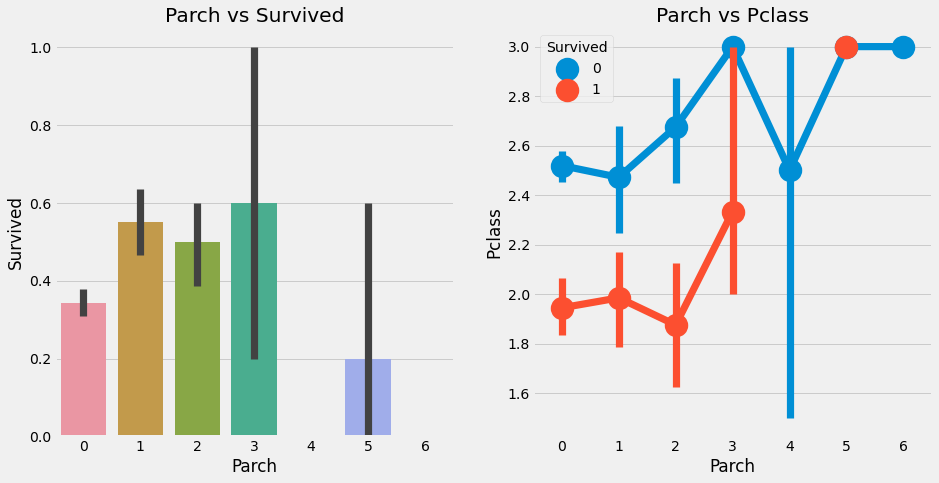

In [37]:
f,ax = plt.subplots(1,2,figsize=(14,7))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot(x='Parch',y='Pclass',hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Parch vs Pclass')

plt.show()

In [38]:
print(f'The lowest fare is {data.Fare.min()}')
print(f'The higest fare is {data.Fare.max()}')
print(f'The avereg fare is {data.Fare.mean()}')

The lowest fare is 0.0
The higest fare is 512.3292
The avereg fare is 32.2042079685746


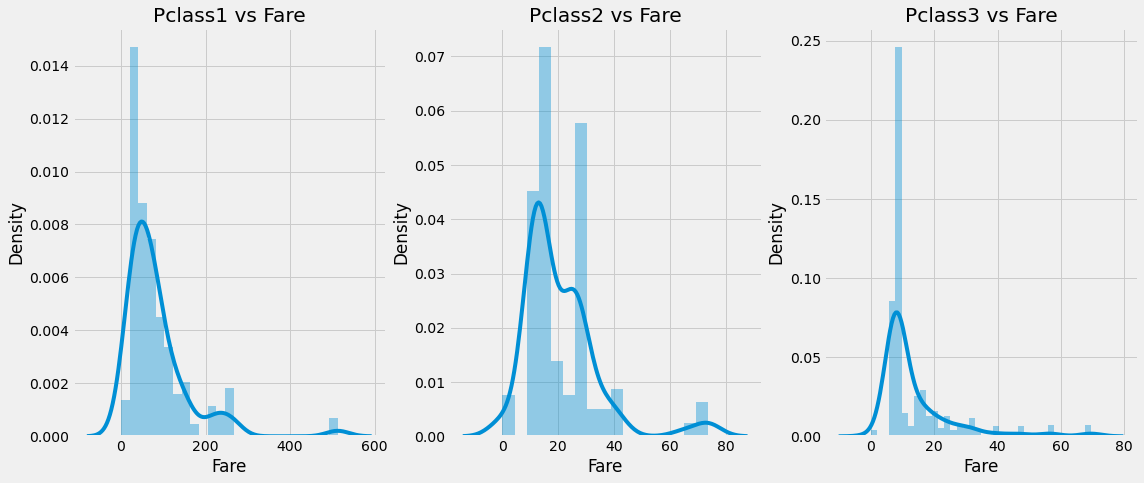

In [39]:
f,ax = plt.subplots(1,3,figsize=(17,7))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Pclass1 vs Fare')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Pclass2 vs Fare')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Pclass3 vs Fare')

plt.show()

# <font color = blue>  OBSERVATION FOR THE ABOVE VISUALIZATIONS  </font>

1. Only 38.4% passengers survived and 61.6% passengers dead.

2. More passengers travelled in Pclass3 as compared to Pclass2 and Pclass3, Even the higest survivals are from Pclass1. 

3. The male passengers travelled is almost doubled the female passengers, Though female passengers has highest survival rate compared to men.

4. From Names of the Passengers, we have extracted the initial with that we have tried to categerise ages which used to fill the na values of the age.

5. Ages 0 to 15, gave highest priority. The higest deaths registerd for 30 to 35 years. and oldest person to survive is 80 years old.

6. From SIbSp, the survival rate descresing on increasing the sibSp values.Family with more than 5 has 0% and alone has some good amount of survival.

7. From Parch, We can see the values ffrom 1-3 has higest survival and 4 and 6 has 0 survival.Alone also has some good survival rate.


<font color = green> Featere Engineering </font>

Age is continous feature, lets try to convert the age feature in ranges by either binning or Normalisation.
Here I am using binning by manual method.

(highest age =80)/(ranges = 5) = 16 values

In [40]:
data['Age_band'] = 0
data.loc[(data['Age'] <= 16),'Age_band'] = 0
data.loc[(data['Age'] > 16)&(data['Age'] <= 32),'Age_band'] = 1
data.loc[(data['Age'] > 32)&(data['Age'] <= 48),'Age_band'] = 2
data.loc[(data['Age'] > 48)&(data['Age'] <= 64),'Age_band'] = 3
data.loc[(data['Age'] >= 64),'Age_band'] = 4

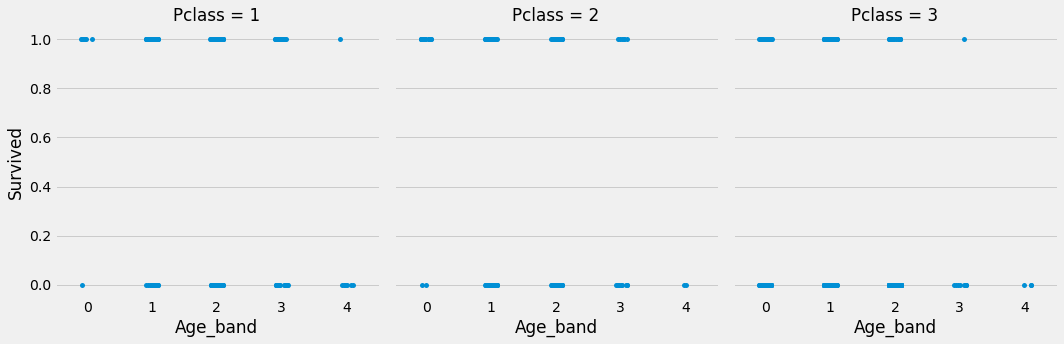

In [43]:
sns.catplot(x='Age_band',y='Survived',col='Pclass',data=data)
plt.show()

Fare has also has continuos value. lets change the fare value to categorical by binning using pandas inbuilt qcut method

In [44]:
data['Fare_range'] = pd.qcut(data['Fare'],4)

In [45]:
pd.crosstab(data['Fare_range'],data['Pclass'],margins = True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Fare_range,,,,
"(-0.001, 7.91]",6,6,211,223
"(7.91, 14.454]",0,86,138,224
"(14.454, 31.0]",51,70,101,222
"(31.0, 512.329]",159,22,41,222
All,216,184,491,891


In [46]:
data['Fare_cate'] = 0
data.loc[(data['Fare'] <= 7.91),'Fare_cate'] = 0
data.loc[(data['Fare'] > 7.91)&(data['Fare'] >= 14.454),'Fare_cate'] = 1
data.loc[(data['Fare'] > 14.454)&(data['Fare']>= 31.0),'Fare_cate'] = 2
data.loc[(data['Fare'] > 31.0),'Age_band'] = 3

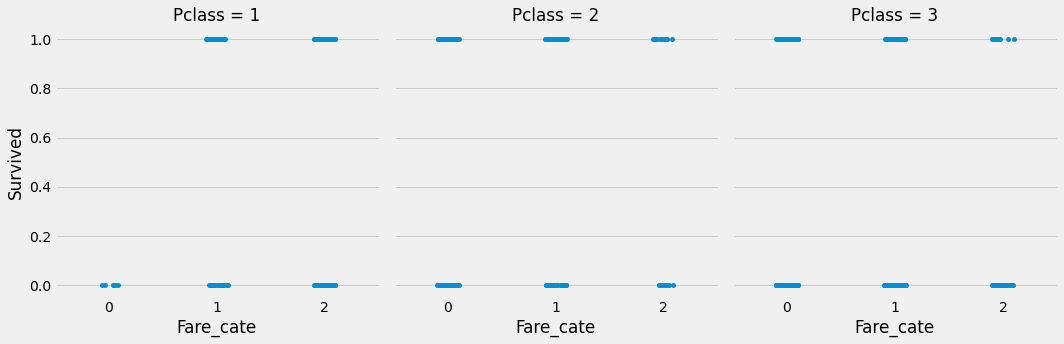

In [48]:
sns.catplot(x='Fare_cate', y='Survived', col='Pclass', data=data)
plt.show()

In [49]:
data['Familysize'] = 0
data['Familysize'] = data['SibSp'] + data['Parch']
data['Alone'] = 0
data.loc[data['Familysize'] ==0,'Alone'] = 1

C:\Users\heman\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\heman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\heman\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)
C:\Users\heman\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been r

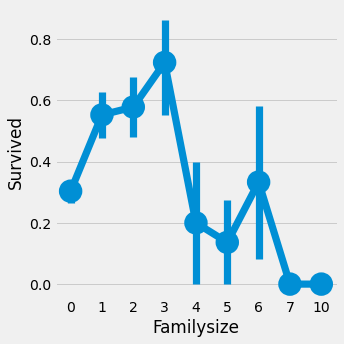

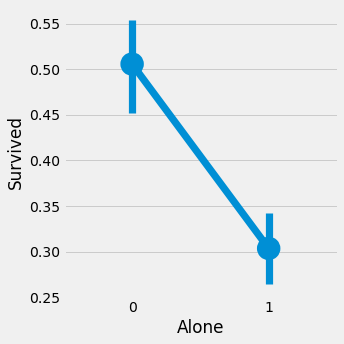

In [37]:
sns.factorplot('Familysize','Survived',data=data, ax=ax[0])
sns.factorplot('Alone','Survived',data=data, ax=ax[1])
plt.show()

In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Fare_range,Fare_cate,Familysize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,"(-0.001, 7.91]",0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3,"(31.0, 512.329]",2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,"(7.91, 14.454]",0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3,"(31.0, 512.329]",2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,"(7.91, 14.454]",0,0,1


Dropping:

    Passengerid -- > unique for eveyone and no use
    
    Name -- > unique for eveyone and no use
    
    Age --> alrady converted to Age_band
    
    Fare, Fare_range -- > already converted to fare_cat
    
    Ticket -- > unique for eveyone and no use
    
    Fare -- > alreday converted to fare_cate
    
    Cabin -- > unique for eveyone and no use
    

In [51]:
data.drop(['PassengerId','Name','Age','Fare','Ticket','Cabin','Fare_range'], axis=1, inplace=True)

In [52]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Fare_cate,Familysize,Alone
0,0,3,male,1,0,S,Mr,1,0,1,0
1,1,1,female,1,0,C,Mrs,3,2,1,0
2,1,3,female,0,0,S,Miss,1,0,0,1
3,1,1,female,1,0,S,Mrs,3,2,1,0
4,0,3,male,0,0,S,Mr,2,0,0,1


In [53]:
data['Sex'].replace(['male','female'],[0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4], inplace=True)

In [54]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Fare_cate,Familysize,Alone
0,0,3,0,1,0,0.0,0,1,0,1,0
1,1,1,1,1,0,1.0,1,3,2,1,0
2,1,3,1,0,0,0.0,2,1,0,0,1
3,1,1,1,1,0,0.0,1,3,2,1,0
4,0,3,0,0,0,0.0,0,2,0,0,1


In [61]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Embarked      2
Initial       0
Age_band      0
Fare_cate     0
Familysize    0
Alone         0
dtype: int64

In [62]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

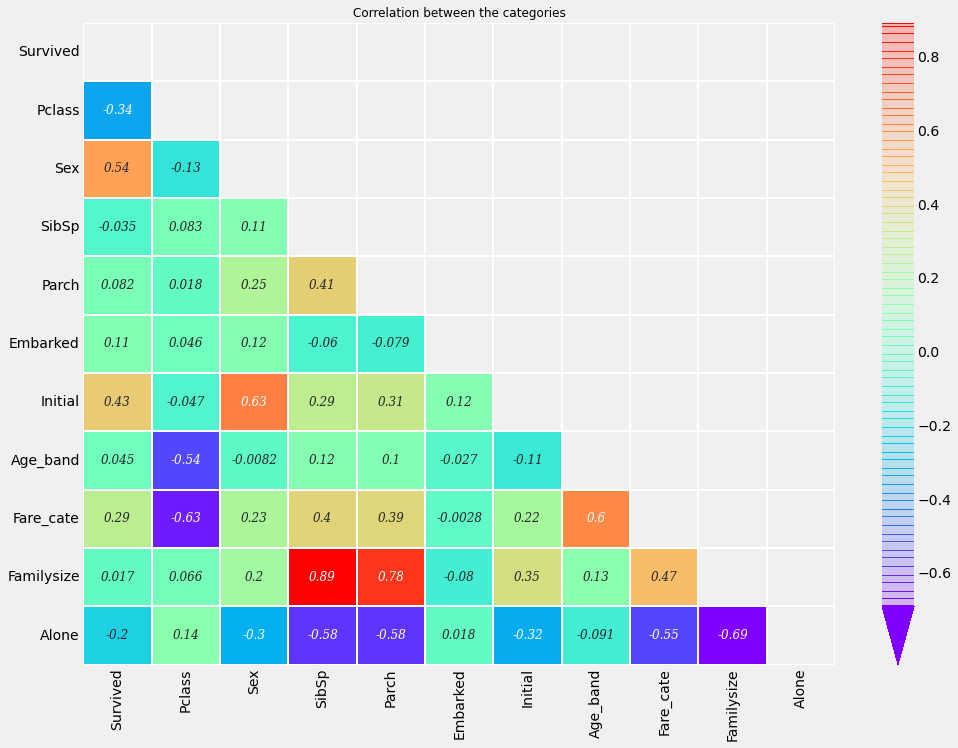

In [63]:
plt.figure(figsize = (15,11))

annot_kws = {'fontsize':12, 'fontstyle':'italic', 'fontfamily':'serif', 'alpha':1 }
cbar_kws = {'shrink':1, 'extend':'min','extendfrac':0.1,'drawedges':True }

matrix = np.triu(data.corr())
sns.heatmap(data.corr(),mask=matrix, annot=True, cmap='rainbow',linewidth =0.2,annot_kws = annot_kws, cbar_kws=cbar_kws)
plt.title('Correlation between the categories', fontsize=12)
plt.show()

In [64]:
X = data.iloc[:,1:]
y = data.iloc[:,:1]

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, mean_absolute_error, roc_auc_score

In [67]:
logis = LogisticRegression()
svmk = SVC(kernel='linear', C=0.1, gamma=0.1)
svmr = SVC(kernel='radial', C=0.1, gamma=0.1)
RFC = RandomForestClassifier()
KNN = KNeighborsClassifier()
NB = GaussianNB()
DTC = DecisionTreeClassifier()

In [68]:
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)

In [69]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[97 18]
 [13 51]]
0.8268156424581006


In [70]:
class metrices_():
    def __init__(self,y_test,y_pred):
        self.y_test = y_test
        self.y_pred = y_pred
        
    def cm(self):
        confusion_matrix_ = confusion_matrix(y_pred, y_test)
        TP = confusion_matrix_[1, 1]        
        TN = confusion_matrix_[0, 0]           
        FP = confusion_matrix_[0, 1]           
        FN = confusion_matrix_[1, 0]

        group_names = ['TN','FP','FN','TP']
        group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_.flatten()/np.sum(confusion_matrix_)]

        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)

        sns.heatmap(confusion_matrix_, annot=labels, fmt='', cmap='Greens')
        
    def cr(self):
        accuracy = accuracy_score(y_pred,y_test)
        print(f'Accuracy Score     : {accuracy}')
        
        precision = precision_score(y_pred,y_test)
        print(f'Precision Score    : {precision}')
        
        recall = recall_score(y_pred,y_test)
        print(f'recall score       : {recall}')
        
        f1 = f1_score(y_pred,y_test)
        print(f'f1 score           : {f1}')
        
        Error = mean_absolute_error(y_pred, y_test)
        print('Mean Absolute Error:', Error)
        
        Roc = roc_auc_score(y_pred, y_test)
        print('ROC Area           :', Roc)


The Classification metrics of Random Forest Classifier
Accuracy Score     : 0.8268156424581006
Precision Score    : 0.7391304347826086
recall score       : 0.796875
f1 score           : 0.7669172932330827
Mean Absolute Error: 0.17318435754189945
ROC Area           : 0.8201766304347826


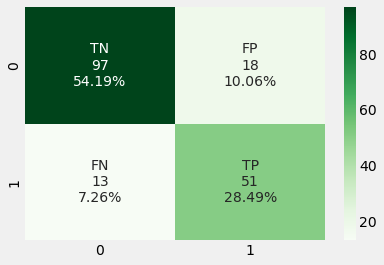

In [71]:
print(f'The Classification metrics of Random Forest Classifier')
print('='*56)
reports = metrices_(y_test,y_pred)
reports.cm()
reports.cr()

The classification metrics of KNN
Accuracy Score     : 0.8212290502793296
Precision Score    : 0.7391304347826086
recall score       : 0.7846153846153846
f1 score           : 0.7611940298507462
Mean Absolute Error: 0.1787709497206704
ROC Area           : 0.8133603238866396


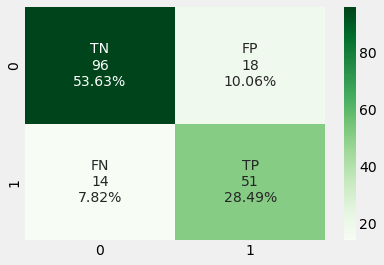

In [72]:
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print('The classification metrics of KNN')
print('='*50)
reports = metrices_(y_pred,y_test)
reports.cm()
reports.cr()

The metrics of logistic regression
Accuracy Score     : 0.7932960893854749
Precision Score    : 0.7101449275362319
recall score       : 0.7424242424242424
f1 score           : 0.725925925925926
Mean Absolute Error: 0.20670391061452514
ROC Area           : 0.7827165459908823


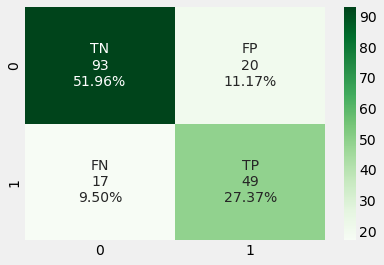

In [73]:
logis.fit(X_train,y_train)
y_pred = logis.predict(X_test)
y_pred = [1 if val >= 0.5 else 0 for val in y_pred]
print('The metrics of logistic regression')
print('='*50)
reports = metrices_(y_pred,y_test)
reports.cm()
reports.cr()

The metrics of SVM kernel: Linear
Accuracy Score     : 0.770949720670391
Precision Score    : 0.7246376811594203
recall score       : 0.6944444444444444
f1 score           : 0.7092198581560285
Mean Absolute Error: 0.22905027932960895
ROC Area           : 0.7584371754932503


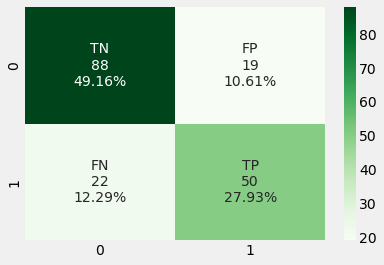

In [74]:
svmk.fit(X_train,y_train)
y_pred = svmk.predict(X_test)
print('The metrics of SVM kernel: Linear')
print('='*55)
reports = metrices_(y_pred,y_test)
reports.cm()
reports.cr()

The metrics of Navie Bayes Classifier
Accuracy Score     : 0.7877094972067039
Precision Score    : 0.8115942028985508
recall score       : 0.691358024691358
f1 score           : 0.7466666666666666
Mean Absolute Error: 0.2122905027932961
ROC Area           : 0.7793524817334341


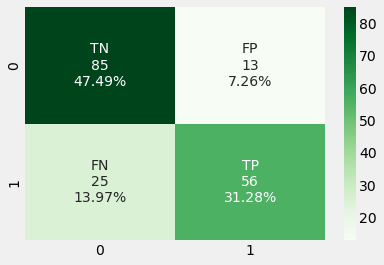

In [75]:
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
print('The metrics of Navie Bayes Classifier')
print('='*55)
reports = metrices_(y_pred,y_test)
reports.cm()
reports.cr()

The metrics of Decision Tree Classifier
Accuracy Score     : 0.8435754189944135
Precision Score    : 0.7391304347826086
recall score       : 0.8360655737704918
f1 score           : 0.7846153846153846
Mean Absolute Error: 0.1564245810055866
ROC Area           : 0.8417616004445679


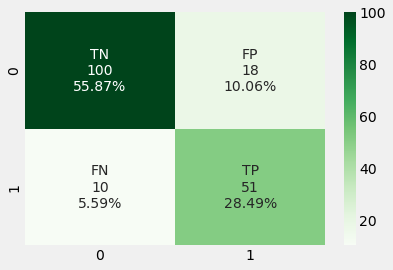

In [76]:
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)
print('The metrics of Decision Tree Classifier')
print('='*55)
reports = metrices_(y_pred,y_test)
reports.cm()
reports.cr()

In [77]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)
scores = cross_val_score(RFC, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.7877095  0.80898876 0.81460674 0.79213483 0.84269663]
Average CV Score:  0.8092272926997678
Number of CV Scores used in Average:  5
